In [16]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [17]:
import numpy as np
import pandas as pd

In [18]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [19]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [20]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [21]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [22]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [23]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [24]:
# Create our session (link) from Python to the DB
session = Session(engine)



In [25]:
first_row_m = session.query(Measurement).first()
print(first_row_m.__dict__)


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000000000B0E4608>, 'station': 'USC00519397', 'prcp': 0.08, 'id': 1, 'date': '2010-01-01', 'tobs': 65.0}


In [26]:
first_row_s = session.query(Station).first()
print(first_row_s.__dict__)

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState object at 0x000000000B60F888>, 'id': 1, 'station': 'USC00519397', 'latitude': 21.2716, 'elevation': 3.0, 'longitude': -157.8168, 'name': 'WAIKIKI 717.2, HI US'}


# Exploratory Climate Analysis

In [53]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

#Get the latest date in the data
first_row_m = session.query(Measurement).order_by(sqlalchemy.desc(Measurement.date)).first()
print(first_row_m.date)
# Calculate the date 1 year ago from the last data point in the database
year_data = session.query(Measurement.prcp, Measurement.date).filter(Measurement.date >= "2016-08-23")
# Perform a query to retrieve the data and precipitation scores
print(year_data.count())
# Save the query results as a Pandas DataFrame and set the index to the date column
year_data_df = pd.DataFrame()
year_data_df = pd.DataFrame(year_data)

year_data_df = year_data_df.dropna()

year_data_df.set_index('date',inplace=True)
year_data_df.index = pd.to_datetime(year_data_df.index)
# Sort the dataframe by date
year_data_df = year_data_df.sort_values(by="date")


print(year_data_df.head(20))

2017-08-23
2230
            prcp
date            
2016-08-23  0.00
2016-08-23  0.02
2016-08-23  0.05
2016-08-23  0.70
2016-08-23  0.15
2016-08-23  1.79
2016-08-24  1.22
2016-08-24  0.08
2016-08-24  2.15
2016-08-24  2.15
2016-08-24  2.28
2016-08-24  1.45
2016-08-25  0.21
2016-08-25  0.08
2016-08-25  0.00
2016-08-25  0.06
2016-08-25  0.00
2016-08-25  0.08
2016-08-25  0.11
2016-08-26  0.04


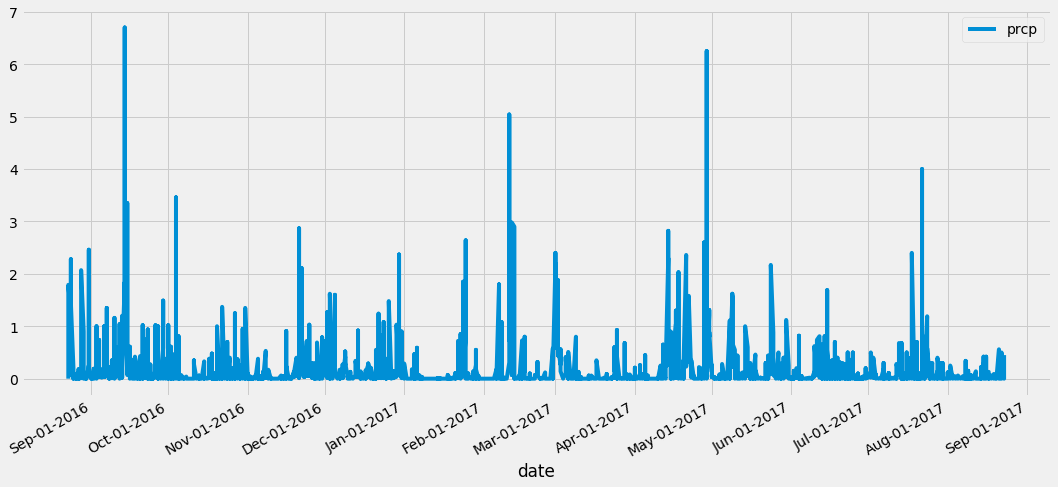

In [81]:
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize=(15,7))
year_data_df.plot(ax=ax, x_compat=True)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d-%Y'))
plt.tight_layout()
plt.show()

In [58]:
# Use Pandas to calcualte the summary statistics for the precipitation data
year_data_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [61]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Measurement.station).distinct().count()
print(station_count)

9


## There are 9 stations available in this dataset

In [73]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(sqlalchemy.desc(func.count(Measurement.station))).all()
print(active_stations)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


## Station USC00519281 has the highest count of activity at 2772. Station USC00518838 has the lowest activity count at 511

In [74]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
temp_analysis = session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()
print(temp_analysis)

[('USC00519281', 54.0, 85.0, 71.66378066378067)]


## Station USC00519281 has a low temp of 54.0, a high temp of 85.0, and an average temp of 71.66

In [82]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_data = session.query(Measurement.station, Measurement.tobs).filter(Measurement.station == "USC00519281").filter(Measurement.date >= "2016-08-23").all()

print(temp_data)

[('USC00519281', 77.0), ('USC00519281', 77.0), ('USC00519281', 80.0), ('USC00519281', 80.0), ('USC00519281', 75.0), ('USC00519281', 73.0), ('USC00519281', 78.0), ('USC00519281', 77.0), ('USC00519281', 78.0), ('USC00519281', 80.0), ('USC00519281', 80.0), ('USC00519281', 78.0), ('USC00519281', 78.0), ('USC00519281', 78.0), ('USC00519281', 73.0), ('USC00519281', 74.0), ('USC00519281', 80.0), ('USC00519281', 79.0), ('USC00519281', 77.0), ('USC00519281', 80.0), ('USC00519281', 76.0), ('USC00519281', 79.0), ('USC00519281', 75.0), ('USC00519281', 79.0), ('USC00519281', 78.0), ('USC00519281', 79.0), ('USC00519281', 78.0), ('USC00519281', 78.0), ('USC00519281', 76.0), ('USC00519281', 74.0), ('USC00519281', 77.0), ('USC00519281', 78.0), ('USC00519281', 79.0), ('USC00519281', 79.0), ('USC00519281', 77.0), ('USC00519281', 80.0), ('USC00519281', 78.0), ('USC00519281', 78.0), ('USC00519281', 78.0), ('USC00519281', 77.0), ('USC00519281', 79.0), ('USC00519281', 79.0), ('USC00519281', 79.0), ('USC00519

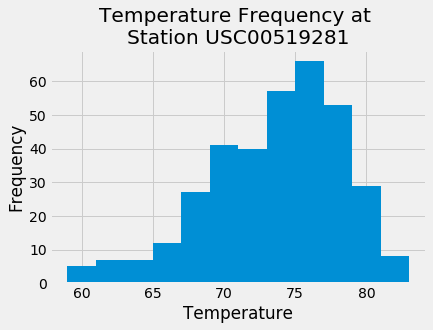

In [88]:
temp_data_df = pd.DataFrame(temp_data)
temp_data_df.hist(bins=12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temperature Frequency at \nStation USC00519281")
plt.show()

## Bonus Challenge Assignment

In [19]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [20]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [21]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [22]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [23]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [24]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [25]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [26]:
# Plot the daily normals as an area plot with `stacked=False`
